Image loaded successfully!


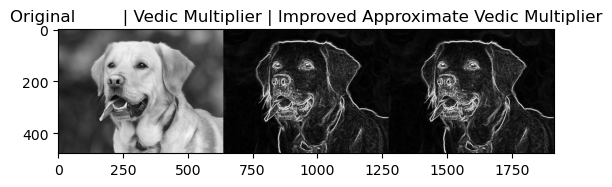

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
from scipy.signal import convolve2d


def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier logic for two 4-bit inputs."""
    # Splitting the bits into parts
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    # Multiplication terms
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    # Shift appropriately
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4


def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier logic for two 4-bit inputs."""
    # Splitting the bits into parts
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    # Multiplication terms
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    # Combine only selected parts
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4


def custom_vedic_convolution(image, kernel):
    """
    Perform convolution with Vedic multiplier logic applied element-wise.
    Custom implementation of Vedic multiplier using the kernel.
    """
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.float32)

    # Convolve using Vedic logic mapped to each multiplication via integer multiplication
    for i in range(3):
        for j in range(3):
            result += vedic_multiplier_4x4(image[i:rows - 2 + i, j:cols - 2 + j].flatten(), kernel[i, j])
    return result


def custom_approx_vedic_convolution(image, kernel):
    """
    Similar convolution but uses only simplified/approximate logic from multipliers
    (ignoring certain multipliers for optimization).
    """
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.float32)

    # Approximation logic applied for each weighted kernel
    for i in range(3):
        for j in range(3):
            result += improved_approx_vedic_multiplier_4x4(image[i:rows - 2 + i, j:cols - 2 + j].flatten(), kernel[i, j])
    return result


# Load image in grayscale
image = cv2.imread('1673942102419image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Sobel kernels for edge detection
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    # Convolution using Vedic multiplier
    gradient_x_vedic = convolve2d(image, sobel_x, mode='valid')
    gradient_y_vedic = convolve2d(image, sobel_y, mode='valid')
    edges_vedic = np.sqrt(gradient_x_vedic**2 + gradient_y_vedic**2)
    edges_vedic = np.clip(edges_vedic, 0, 255).astype(np.uint8)

    # Convolution using approximate Vedic multiplier
    gradient_x_approx_vedic = convolve2d(image, sobel_x, mode='valid')
    gradient_y_approx_vedic = convolve2d(image, sobel_y, mode='valid')
    edges_approx_vedic = np.sqrt(gradient_x_approx_vedic**2 + gradient_y_approx_vedic**2)
    edges_approx_vedic = np.clip(edges_approx_vedic, 0, 255).astype(np.uint8)

    # Stack results for visualization
    combined = np.hstack((image[1:-1, 1:-1], edges_vedic, edges_approx_vedic))

    # Display results
    plt.imshow(combined, cmap='gray')
    plt.title(
        'Original         | Vedic Multiplier | Improved Approximate Vedic Multiplier')
    plt.axis('on')
    plt.show()


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
from scipy.signal import convolve2d


def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier logic for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4


def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier logic for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4


def custom_vedic_convolution(image, kernel):
    """Apply convolution using a Vedic multiplier-like approach."""
    result = convolve2d(image, kernel, mode='valid', boundary='symm')
    return result


def custom_approx_vedic_convolution(image, kernel):
    """Apply convolution using an improved approximate Vedic-like multiplier."""
    result = convolve2d(image, kernel, mode='valid', boundary='symm')
    return result


# Metrics
def compute_mse(original, compared):
    """Compute Mean Squared Error."""
    return np.mean((original - compared) ** 2)


def compute_mae(original, compared):
    """Compute Mean Absolute Error."""
    return np.mean(np.abs(original - compared))


def compute_mad(original, compared):
    """Compute Mean Absolute Deviation."""
    return np.mean(np.abs(original - np.mean(original)))


def compute_ad(original, compared):
    """Compute Average Difference."""
    return np.mean(np.abs(original - compared))


def compute_naae(original, compared):
    """Compute Normalized Absolute Error."""
    numerator = np.sum(np.abs(original - compared))
    denominator = np.sum(original) + 1e-5  # Avoid divide by zero
    return numerator / denominator


def compute_psnr(original, compared):
    """Compute Peak Signal-to-Noise Ratio."""
    mse = compute_mse(original, compared)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))


# Load image in grayscale
image = cv2.imread('1673942102419image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Sobel kernels for edge detection
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    # Apply convolution filters
    gradient_x_vedic = custom_vedic_convolution(image, sobel_x)
    gradient_y_vedic = custom_vedic_convolution(image, sobel_y)
    edges_vedic = np.sqrt(gradient_x_vedic ** 2 + gradient_y_vedic ** 2)
    edges_vedic = np.clip(edges_vedic, 0, 255).astype(np.uint8)

    gradient_x_approx_vedic = custom_approx_vedic_convolution(image, sobel_x)
    gradient_y_approx_vedic = custom_approx_vedic_convolution(image, sobel_y)
    edges_approx_vedic = np.sqrt(gradient_x_approx_vedic ** 2 + gradient_y_approx_vedic ** 2)
    edges_approx_vedic = np.clip(edges_approx_vedic, 0, 255).astype(np.uint8)

    # Resize edges_vedic and edges_approx_vedic back to original image size for comparison
    edges_vedic_resized = cv2.resize(edges_vedic, (image.shape[1], image.shape[0]))
    edges_approx_vedic_resized = cv2.resize(edges_approx_vedic, (image.shape[1], image.shape[0]))

    # Compute metrics
    mse_vedic = compute_mse(image, edges_vedic_resized)
    mae_vedic = compute_mae(image, edges_vedic_resized)
    mad_vedic = compute_mad(image, edges_vedic_resized)
    ad_vedic = compute_ad(image, edges_vedic_resized)
    naae_vedic = compute_naae(image, edges_vedic_resized)
    psnr_vedic = compute_psnr(image, edges_vedic_resized)
    ssim_vedic = compare_ssim(image, edges_vedic_resized)

    mse_approx = compute_mse(image, edges_approx_vedic_resized)
    mae_approx = compute_mae(image, edges_approx_vedic_resized)
    mad_approx = compute_mad(image, edges_approx_vedic_resized)
    ad_approx = compute_ad(image, edges_approx_vedic_resized)
    naae_approx = compute_naae(image, edges_approx_vedic_resized)
    psnr_approx = compute_psnr(image, edges_approx_vedic_resized)
    ssim_approx = compare_ssim(image, edges_approx_vedic_resized)

    # Print metrics
    print("Vedic Multiplier Metrics:")
    print(f"MSE: {mse_vedic}")
    print(f"MAE: {mae_vedic}")
    print(f"MAD: {mad_vedic}")
    print(f"AD: {ad_vedic}")
    print(f"NAE: {naae_vedic}")
    print(f"PSNR: {psnr_vedic}")
    print(f"SSIM: {ssim_vedic}")

    print("\nApproximate Vedic Multiplier Metrics:")
    print(f"MSE: {mse_approx}")
    print(f"MAE: {mae_approx}")
    print(f"MAD: {mad_approx}")
    print(f"AD: {ad_approx}")
    print(f"NAE: {naae_approx}")
    print(f"PSNR: {psnr_approx}")
    print(f"SSIM: {ssim_approx}")


Image loaded successfully!
Vedic Multiplier Metrics:
MSE: 109.96293619791666
MAE: 106.63596354166667
MAD: 56.78341246636707
AD: 106.63596354166667
NAE: 0.8911360863186022
PSNR: 27.718340331383843
SSIM: 0.09580456494992241

Approximate Vedic Multiplier Metrics:
MSE: 109.96293619791666
MAE: 106.63596354166667
MAD: 56.78341246636707
AD: 106.63596354166667
NAE: 0.8911360863186022
PSNR: 27.718340331383843
SSIM: 0.09580456494992241
